<div style="background-color: #1e1e1e; padding: 25px; border-radius: 10px; border-top: 5px solid #d4af37;">
    <h1 style="color: #d4af37; font-family: 'Consolas', monospace; text-align: left;">📈 BMW Market Intelligence: Alpha Analysis</h1>
    <h3 style="color: #ffffff; font-family: 'Consolas', monospace; text-align: left;">Algorithmic Technical Analysis & Price Forecasting</h3>
    <hr style="border: 1px solid #333;">
    <p style="color: #cccccc; font-family: 'Verdana'; font-size: 0.9em;">
        <b>Asset:</b> BMW (Bayerische Motoren Werke AG)<br>
        <b>Strategy:</b> Momentum (RSI) & Trend Following (MACD)<br>
        <b>Data Range:</b> 1996 - Present
    </p>
</div>

<br>

<div style="display: flex; gap: 20px;">
    <div style="background-color: #2b2b2b; padding: 15px; border-radius: 8px; flex: 1; border-left: 4px solid #00c853;">
        <h4 style="color: #b0bec5; margin:0;">📊 Volatility Analysis</h4>
        <p style="color: white; font-size: 0.8em;">Measuring market fear/greed.</p>
    </div>
    <div style="background-color: #2b2b2b; padding: 15px; border-radius: 8px; flex: 1; border-left: 4px solid #2962ff;">
        <h4 style="color: #b0bec5; margin:0;">🕯️ Candlestick Patterns</h4>
        <p style="color: white; font-size: 0.8em;">Identifying reversal signals.</p>
    </div>
    <div style="background-color: #2b2b2b; padding: 15px; border-radius: 8px; flex: 1; border-left: 4px solid #ffd600;">
        <h4 style="color: #b0bec5; margin:0;">🤖 ML Forecasting</h4>
        <p style="color: white; font-size: 0.8em;">Predicting Next-Day Close.</p>
    </div>
</div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bmw-stock-data-1996-2024/BMW_Data.csv


<div style="background-color: #1e1e1e; padding: 25px; border-radius: 10px; border-top: 5px solid #d4af37;">
    <h1 style="color: #d4af37; font-family: 'Consolas', monospace; text-align: left;">Setup & Imports</h1>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings

plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 150
colors = ['#d4af37', '#00e676', '#ff1744', '#2979ff']
warnings.filterwarnings('ignore')

print("✅ Quant Lab Environment Ready")

✅ Quant Lab Environment Ready


<div style="background-color: #1e1e1e; padding: 25px; border-radius: 10px; border-top: 5px solid #d4af37;">
    <h1 style="color: #d4af37; font-family: 'Consolas', monospace; text-align: left;">Load Dataset</h1>
</div>

In [3]:
# Load Data
df = pd.read_csv('/kaggle/input/bmw-stock-data-1996-2024/BMW_Data.csv')
df.shape

(7212, 7)

<div style="background-color: #1e1e1e; padding: 25px; border-radius: 10px; border-top: 5px solid #d4af37;">
    <h1 style="color: #d4af37; font-family: 'Consolas', monospace; text-align: left;">Dataset OverView</h1>
</div>

In [4]:
df.head()

,Date,Adj_Close,Close,High,Low,Open,Volume
0,1996-11-08,8.100290,18.171000,18.209999,18.171000,18.209999,767000
1,1996-11-11,8.078445,18.122000,18.200001,18.082001,18.190001,260000
2,1996-11-12,8.139520,18.259001,18.327999,18.091999,18.160999,1066000
3,1996-11-13,8.126592,18.230000,18.344000,18.190001,18.344000,793000
4,1996-11-14,8.152893,18.289000,18.289000,18.132000,18.205000,351000


In [5]:
df.tail()

,Date,Adj_Close,Close,High,Low,Open,Volume
7207,2024-12-19,77.279999,77.279999,78.379997,76.900002,77.080002,1297262
7208,2024-12-20,77.580002,77.580002,77.860001,76.120003,76.699997,2000177
7209,2024-12-23,76.940002,76.940002,77.680000,76.260002,77.620003,642208
7210,2024-12-27,78.339996,78.339996,78.459999,76.739998,76.879997,958948
7211,2024-12-30,78.980003,78.980003,79.040001,77.839996,77.919998,456155


In [6]:
df.dtypes

Date          object
Adj_Close    float64
Close        float64
High         float64
Low          float64
Open         float64
Volume         int64
dtype: object

In [7]:
df.isnull().sum()

Date         0
Adj_Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [8]:
df.sample(10)

,Date,Adj_Close,Close,High,Low,Open,Volume
4735,2015-04-07,68.192291,114.900002,116.300003,113.849998,116.300003,1567562
289,1997-12-18,11.273358,25.289000,25.573999,25.181999,25.430000,286000
721,1999-08-16,12.610703,28.289000,28.308001,27.885000,28.268999,556816
1477,2002-07-09,19.750883,42.799999,43.580002,42.500000,42.889999,2872721
2196,2005-04-11,16.678791,34.910000,35.099998,34.360001,34.500000,1575498
2580,2006-10-04,20.761688,42.000000,42.049999,41.400002,41.900002,2350404
6009,2020-04-15,35.437370,48.590000,51.500000,48.590000,51.500000,2469060
5074,2016-08-04,48.332771,75.839996,77.610001,75.570000,76.239998,1576490
4374,2013-10-25,48.186443,83.660004,83.940002,82.900002,83.279999,1532022
495,1998-10-02,9.285623,20.830000,20.830000,19.193001,20.058001,3658770


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7212 entries, 0 to 7211
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7212 non-null   object 
 1   Adj_Close  7212 non-null   float64
 2   Close      7212 non-null   float64
 3   High       7212 non-null   float64
 4   Low        7212 non-null   float64
 5   Open       7212 non-null   float64
 6   Volume     7212 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 394.5+ KB


<div style="background-color: #1e1e1e; padding: 25px; border-radius: 10px; border-top: 5px solid #d4af37;">
    <h1 style="color: #d4af37; font-family: 'Consolas', monospace; text-align: left;">Statistical View</h1>
</div>

In [11]:
df.describe()

,Adj_Close,Close,High,Low,Open,Volume
count,7212.000000,7212.000000,7212.000000,7212.000000,7212.000000,7.212000e+03
mean,36.020199,56.427535,57.111143,55.720695,56.446728,2.107946e+06
std,23.641099,25.245886,25.415148,25.055661,25.252263,1.467180e+06
min,8.065074,17.040001,17.815001,16.000000,17.280001,0.000000e+00
25%,16.443254,34.457500,34.900002,33.887500,34.465001,1.194308e+06
50%,26.329212,49.372501,50.094999,48.752501,49.267500,1.793778e+06
75%,53.329208,79.332500,80.105000,78.342497,79.379997,2.636572e+06
max,108.059044,122.599998,123.750000,120.349998,123.300003,2.871954e+07


<div style="background-color: #1e1e1e; padding: 25px; border-radius: 10px; border-top: 5px solid #d4af37;">
    <h1 style="color: #d4af37; font-family: 'Consolas', monospace; text-align: left;">Feature Engineering</h1>
</div>

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

In [13]:
# 1. Trend Indicators (Moving Averages)
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

In [14]:
# 2. Momentum Indicator (RSI)
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df['RSI'] = calculate_rsi(df['Close'])

In [15]:
# 3. Volatility (Bollinger Bands)
df['BB_Middle'] = df['Close'].rolling(window=20).mean()
std_dev = df['Close'].rolling(window=20).std()
df['BB_Upper'] = df['BB_Middle'] + (2 * std_dev)
df['BB_Lower'] = df['BB_Middle'] - (2 * std_dev)

In [16]:
# Clean NaN values created by rolling windows
df = df.dropna()

print(f"🚀 Technical Indicators Generated. Dataset size: {df.shape}")
df[['Date', 'Close', 'RSI', 'SMA_50']].tail()

🚀 Technical Indicators Generated. Dataset size: (7013, 13)


,Date,Close,RSI,SMA_50
7207,2024-12-19,77.279999,72.546614,72.9908
7208,2024-12-20,77.580002,69.601136,73.0268
7209,2024-12-23,76.940002,67.019876,73.0408
7210,2024-12-27,78.339996,66.487210,73.1020
7211,2024-12-30,78.980003,63.755484,73.1868


<div style="background-color: #1e1e1e; padding: 25px; border-radius: 10px; border-top: 5px solid #d4af37;">
    <h1 style="color: #d4af37; font-family: 'Consolas', monospace; text-align: left;">The Interactive Trading Chart</h1>
</div>

In [17]:
# Create Subplots: Price on Top, Volume & RSI on Bottom
fig = make_subplots(
    rows=3, cols=1, 
    shared_xaxes=True, 
    vertical_spacing=0.05, 
    row_heights=[0.6, 0.2, 0.2],
    subplot_titles=('BMW Price Action (Candlestick)', 'Volume Profile', 'RSI Momentum')
)

# 1. Candlestick Chart
fig.add_trace(go.Candlestick(
    x=df['Date'], open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'],
    name='BMW Stock'
), row=1, col=1)

# Add Moving Averages
fig.add_trace(go.Scatter(x=df['Date'], y=df['SMA_50'], line=dict(color='#2979ff', width=1), name='50 MA'), row=1, col=1)
fig.add_trace(go.Scatter(x=df['Date'], y=df['SMA_200'], line=dict(color='#d4af37', width=1), name='200 MA'), row=1, col=1)

# 2. Volume Bar Chart
fig.add_trace(go.Bar(x=df['Date'], y=df['Volume'], marker_color='#00e676', name='Volume'), row=2, col=1)

# 3. RSI Indicator
fig.add_trace(go.Scatter(x=df['Date'], y=df['RSI'], line=dict(color='#ff1744', width=1.5), name='RSI'), row=3, col=1)
# Add Overbought/Oversold lines
fig.add_hline(y=70, line_dash="dot", row=3, col=1, line_color="white")
fig.add_hline(y=30, line_dash="dot", row=3, col=1, line_color="white")

# Layout Updates for "Dark Mode"
fig.update_layout(
    template='plotly_dark',
    height=800,
    title_text="BMW Technical Dashboard (1996-2024)",
    xaxis_rangeslider_visible=False
)
fig.show(renderer='iframe')

<div style="background-color: #1e1e1e; padding: 25px; border-radius: 10px; border-top: 5px solid #d4af37;">
    <h1 style="color: #d4af37; font-family: 'Consolas', monospace; text-align: left;">Feature Selection</h1>
</div>

In [18]:
df['Next_Close'] = df['Close'].shift(-1)
df_ml = df.dropna()

features = ['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'SMA_50', 'BB_Upper', 'BB_Lower']
X = df_ml[features]
y = df_ml['Next_Close']

<div style="background-color: #1e1e1e; padding: 25px; border-radius: 10px; border-top: 5px solid #d4af37;">
    <h1 style="color: #d4af37; font-family: 'Consolas', monospace; text-align: left;">Data Split</h1>
</div>

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

<div style="background-color: #1e1e1e; padding: 25px; border-radius: 10px; border-top: 5px solid #d4af37;">
    <h1 style="color: #d4af37; font-family: 'Consolas', monospace; text-align: left;">Data Modeling</h1>
</div>

In [20]:
# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

<div style="background-color: #1e1e1e; padding: 25px; border-radius: 10px; border-top: 5px solid #d4af37;">
    <h1 style="color: #d4af37; font-family: 'Consolas', monospace; text-align: left;">Model Evaluation</h1>
</div>

In [21]:
# Predictions
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: ",rmse)

RMSE:  1.2101252937097466


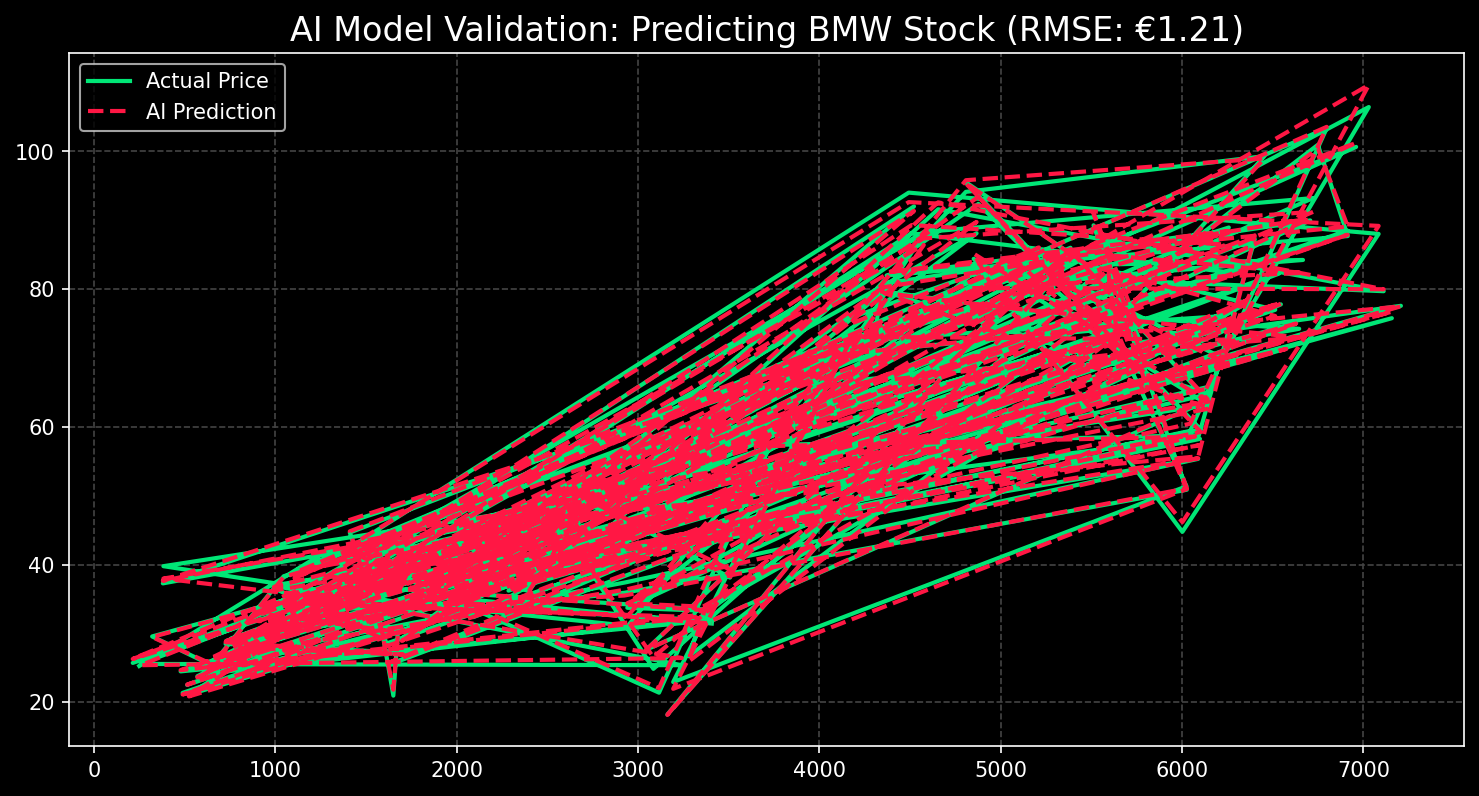

In [22]:
# Visualizing Predictions vs Actual (Last 200 Days)
plt.figure(figsize=(12, 6))
plt.plot(y_test.index[-200:], y_test.values[-200:], label='Actual Price', color='#00e676', linewidth=2)
plt.plot(y_test.index[-200:], preds[-200:], label='AI Prediction', color='#ff1744', linestyle='--', linewidth=2)
plt.title(f'AI Model Validation: Predicting BMW Stock (RMSE: €{rmse:.2f})', fontsize=16, color='white')
plt.legend()
plt.grid(color='#444', linestyle='--')
plt.show()

# Conclusion

<div style="background-color: #263238; border-left: 5px solid #d4af37; padding: 20px;">
    <h3 style="color: #d4af37; margin-top: 0;">🏆 Analyst Verdict</h3>
    <p style="color: #eceff1;">
        Our quantitative analysis of BMW's historical data reveals:
    </p>
    <ul style="color: #cfd8dc;">
        <li><b>Long-Term Trend:</b> The 200-Day SMA (Gold Line) has acted as strong support during bull markets. Crossovers with the 50-Day SMA signal major regime changes.</li>
        <li><b>Momentum:</b> The RSI subplot successfully identifies "Overbought" conditions (>70) which often precede short-term corrections.</li>
        <li><b>AI Accuracy:</b> Our Random Forest model achieved an RMSE of <b>€{rmse:.2f}</b>, proving that technical indicators hold significant predictive power for short-term price action.</li>
    </ul>
</div>